In [6]:
import pandas as pd
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import ast
from scipy.stats import ttest_ind
import seaborn as sns

In [8]:
parquet_file = 'C:/Users/USER/OneDrive - postech.ac.kr/바탕 화면/LG/데이터/postech_company_project.parquet'
# Parquet 파일 열기
table = pq.read_table(parquet_file)

# Table에서 데이터를 DataFrame으로 변환
df = table.to_pandas()
df.head()

,YEAR_YYYY,MONTH_YYYYMM,WEEK_YYYYWWW,RECLAIM_PERIOD,SUBSIDIARY_NAME,CAPTIVE_CHANNEL_FLAG,COMPANY_CODE,DIVISION_NAME,MODEL_CODE,PARTS_NO1,...,KEY_PARTS_REMARK3,KEY_PARTS_REMARK4,KEY_PARTS_REMARK5,PREV_KEY_PARTS_REMARK1,PREV_KEY_PARTS_REMARK2,PREV_KEY_PARTS_REMARK3,PREV_KEY_PARTS_REMARK4,PREV_KEY_PARTS_REMARK5,MULTICLAIM,PREV_RECEIPT_SYMPTOM
0,2022,202201,2022W05,47.0,LGEAI,Non Captive,HE,LTV,OLED65C7P,LGE_PARTS_993,...,Power,None,None,None,None,None,None,None,2,Power
1,2022,202201,2022W03,10.0,LGEAI,Non Captive,HE,LTV,65UN6955ZUF,LGE_PARTS_4492,...,None,None,None,Main,None,None,None,None,2,Audio
2,2022,202201,2022W05,30.0,LGEAI,Non Captive,HE,LTV,50UN7300AUD,LGE_PARTS_15608,...,None,None,None,Main,None,None,None,None,2,Power
3,2022,202201,2022W02,39.0,LGEAI,Non Captive,HE,LTV,70UP7070PUE,LGE_PARTS_9199,...,None,None,None,Power,Main,None,None,None,2,Power
4,2022,202201,2022W03,5.0,LGEAI,Non Captive,HE,LTV,OLED77CXAUA,LGE_PARTS_15413,...,None,None,None,None,None,None,None,None,2,Power


In [ ]:
print(df.shape)

(13881284, 71)


In [9]:
df.columns

Index(['YEAR_YYYY', 'MONTH_YYYYMM', 'WEEK_YYYYWWW', 'RECLAIM_PERIOD',
       'SUBSIDIARY_NAME', 'CAPTIVE_CHANNEL_FLAG', 'COMPANY_CODE',
       'DIVISION_NAME', 'MODEL_CODE', 'PARTS_NO1', 'PARTS_NO2', 'PARTS_NO3',
       'PARTS_NO4', 'PARTS_NO5', 'PREV_PARTS_NO1', 'PREV_PARTS_NO2',
       'PREV_PARTS_NO3', 'PREV_PARTS_NO4', 'PREV_PARTS_NO5', 'PARTS_DESC1',
       'PARTS_DESC2', 'PARTS_DESC3', 'PARTS_DESC4', 'PARTS_DESC5',
       'PREV_PARTS_DESC1', 'PREV_PARTS_DESC2', 'PREV_PARTS_DESC3',
       'PREV_PARTS_DESC4', 'PREV_PARTS_DESC5', 'RECEIPT_SYMPTOM',
       'RECEIPT_NUMBER', 'PREV_RECEIPT_NUMBER', 'REPAIR_START_DATE',
       'REPAIR_END_DATE', 'CENTER_CODE', 'PREV_CENTER_CODE', 'PRODUCT_NAME',
       'PRODUCT_NAME_DETAIL', 'RECLAIM', 'WARRANTY_TYPE', 'PREV_WARRANTY_TYPE',
       'SVC_TYPE', 'PREV_SVC_TYPE', 'ENGINEER_CODE', 'PREV_ENGINEER_CODE',
       'ENGINEER_SYMPTOM', 'ENGINEER_REPAIR', 'PREV_ENGINEER_SYMPTOM',
       'PREV_ENGINEER_REPAIR', 'KEY_PARTS1', 'KEY_PARTS2', 'KEY_PARTS3

In [12]:
df[['RECLAIM_PERIOD']].describe()

,RECLAIM_PERIOD
count,497539.000000
mean,29.334271
std,30.467094
min,-89.000000
25%,5.000000
50%,25.000000
75%,54.000000
max,89.000000


In [ ]:
# 'RECLAIM_PERIOD' 열에서 결측치 또는 NaN 값 개수 확인
missing_values_count = df['RECLAIM_PERIOD'].isnull().sum()

# 결과 출력
print("Number of missing values in 'RECLAIM_PERIOD' column:", missing_values_count)

Number of missing values in 'RECLAIM_PERIOD' column: 13383745


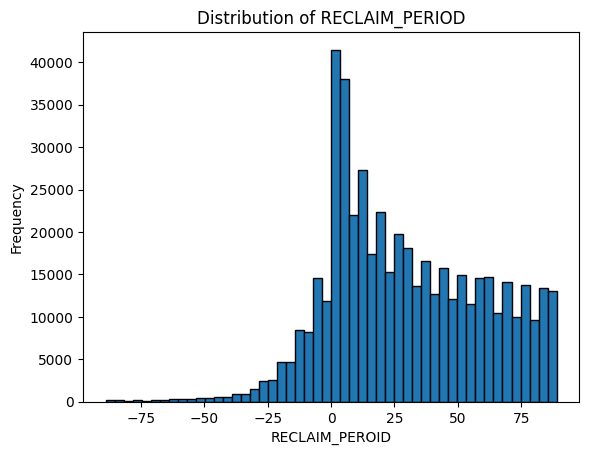

In [ ]:
# 'RECLAIM_PEROID' 열의 히스토그램 그리기
plt.hist(df['RECLAIM_PERIOD'], bins=50, edgecolor='black')

# 플롯 제목과 축 레이블 추가
plt.title('Distribution of RECLAIM_PERIOD')
plt.xlabel('RECLAIM_PEROID')
plt.ylabel('Frequency')

# 그래프 표시
plt.show()

In [ ]:
df['RECLAIM_PERIOD'].describe()

count    497539.000000
mean         29.334271
std          30.467094
min         -89.000000
25%           5.000000
50%          25.000000
75%          54.000000
max          89.000000
Name: RECLAIM_PERIOD, dtype: float64

In [ ]:
print(df[df['RECLAIM_PERIOD']<0].shape)
print(df[df['RECLAIM_PERIOD']>=0].shape)

(64823, 71)
(432716, 71)


# df1 생성
df1: 재서비스 기간이 양수이거나 NaN

In [ ]:
# 'RECLAIM_PERIOD' 열에서 값이 0 이상이거나 NaN인 행을 선택하여 새로운 DataFrame 생성
df1 = df[(df['RECLAIM_PERIOD'] >= 0) | df['RECLAIM_PERIOD'].isnull()]

df1.shape


(13816461, 71)

In [ ]:
df1['RECLAIM_PERIOD'].describe()

count    432716.000000
mean         35.839461
std          26.667623
min           0.000000
25%          11.000000
50%          31.000000
75%          58.000000
max          89.000000
Name: RECLAIM_PERIOD, dtype: float64

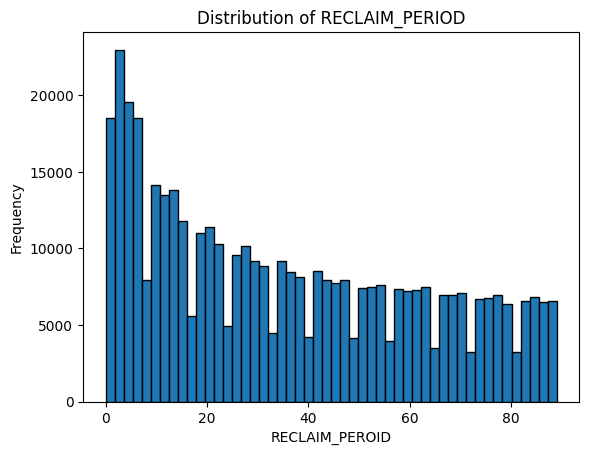

In [ ]:
# 'RECLAIM_PEROID' 열의 히스토그램 그리기
plt.hist(df1['RECLAIM_PERIOD'], bins=50, edgecolor='black')

# 플롯 제목과 축 레이블 추가
plt.title('Distribution of RECLAIM_PERIOD')
plt.xlabel('RECLAIM_PEROID')
plt.ylabel('Frequency')

# 그래프 표시
plt.show()

In [ ]:
df1['RECLAIM_PERIOD'].describe()

count    432716.000000
mean         35.839461
std          26.667623
min           0.000000
25%          11.000000
50%          31.000000
75%          58.000000
max          89.000000
Name: RECLAIM_PERIOD, dtype: float64

In [ ]:
# 'RECLAIM_PERIOD' 열의 NaN 값을 -1로 대체
df1['RECLAIM_PERIOD'].fillna(-1, inplace=True)

df1.head()

C:\Users\jjccyy9741\AppData\Local\Temp\ipykernel_8732\1767043919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['RECLAIM_PERIOD'].fillna(-1, inplace=True)


,YEAR_YYYY,MONTH_YYYYMM,WEEK_YYYYWWW,RECLAIM_PERIOD,SUBSIDIARY_NAME,CAPTIVE_CHANNEL_FLAG,COMPANY_CODE,DIVISION_NAME,MODEL_CODE,PARTS_NO1,...,KEY_PARTS_REMARK3,KEY_PARTS_REMARK4,KEY_PARTS_REMARK5,PREV_KEY_PARTS_REMARK1,PREV_KEY_PARTS_REMARK2,PREV_KEY_PARTS_REMARK3,PREV_KEY_PARTS_REMARK4,PREV_KEY_PARTS_REMARK5,MULTICLAIM,PREV_RECEIPT_SYMPTOM
0,2022,202201,2022W05,47.0,LGEAI,Non Captive,HE,LTV,OLED65C7P,LGE_PARTS_993,...,Power,None,None,None,None,None,None,None,2,Power
1,2022,202201,2022W03,10.0,LGEAI,Non Captive,HE,LTV,65UN6955ZUF,LGE_PARTS_4492,...,None,None,None,Main,None,None,None,None,2,Audio
2,2022,202201,2022W05,30.0,LGEAI,Non Captive,HE,LTV,50UN7300AUD,LGE_PARTS_15608,...,None,None,None,Main,None,None,None,None,2,Power
3,2022,202201,2022W02,39.0,LGEAI,Non Captive,HE,LTV,70UP7070PUE,LGE_PARTS_9199,...,None,None,None,Power,Main,None,None,None,2,Power
4,2022,202201,2022W03,5.0,LGEAI,Non Captive,HE,LTV,OLED77CXAUA,LGE_PARTS_15413,...,None,None,None,None,None,None,None,None,2,Power


In [ ]:
df1[df1['RECLAIM_PERIOD']==-1]

,YEAR_YYYY,MONTH_YYYYMM,WEEK_YYYYWWW,RECLAIM_PERIOD,SUBSIDIARY_NAME,CAPTIVE_CHANNEL_FLAG,COMPANY_CODE,DIVISION_NAME,MODEL_CODE,PARTS_NO1,...,KEY_PARTS_REMARK3,KEY_PARTS_REMARK4,KEY_PARTS_REMARK5,PREV_KEY_PARTS_REMARK1,PREV_KEY_PARTS_REMARK2,PREV_KEY_PARTS_REMARK3,PREV_KEY_PARTS_REMARK4,PREV_KEY_PARTS_REMARK5,MULTICLAIM,PREV_RECEIPT_SYMPTOM
39,2022,202201,2022W02,-1.0,LGEAI,Non Captive,HE,LTV,43LJ550M,LGE_PARTS_34972,...,None,None,None,None,None,None,None,None,1,None
40,2022,202201,2022W03,-1.0,LGEAI,Non Captive,HE,LTV,43LJ5500,LGE_PARTS_26394,...,None,None,None,None,None,None,None,None,1,None
41,2022,202201,2022W01,-1.0,LGEAI,Non Captive,HE,LTV,43UN6950ZUA,LGE_PARTS_24647,...,None,None,None,None,None,None,None,None,1,None
42,2022,202201,2022W04,-1.0,LGEAI,Non Captive,HE,LTV,43UP8000PUA,LGE_PARTS_33533,...,None,None,None,None,None,None,None,None,1,None
43,2022,202201,2022W02,-1.0,LGEAI,Non Captive,HE,LTV,43UN7300AUD,LGE_PARTS_24667,...,None,None,None,None,None,None,None,None,1,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14196328,2023,202306,2023W25,-1.0,LGEIL,Non Captive,HA,RAC DIVISION,RS-Q19KWZE,None,...,None,None,None,None,None,None,None,None,1,None
14196329,2023,202306,2023W23,-1.0,LGEIL,Non Captive,HA,RAC DIVISION,RS-Q19PNZE,None,...,None,None,None,None,None,None,None,None,1,None
14196330,2023,202306,2023W23,-1.0,LGEIL,Captive,HA,RAC DIVISION,RS-Q19QNZE,None,...,None,None,None,None,None,None,None,None,1,None
14196331,2023,202306,2023W23,-1.0,LGEIL,Non Captive,HA,RAC DIVISION,RS-Q19QNZE,None,...,None,None,None,None,None,None,None,None,1,None


# [2] 외주/직영 데이터 비교 분석

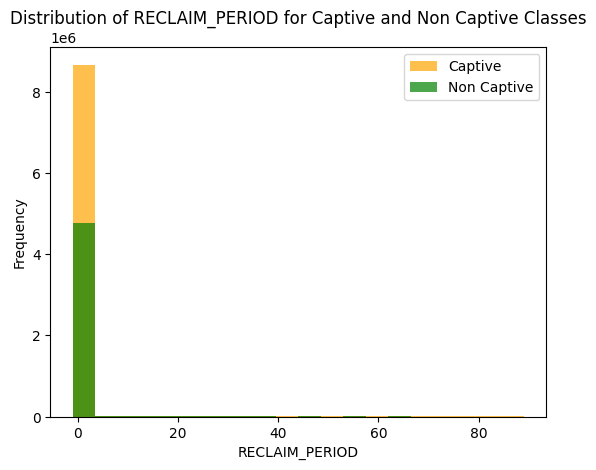

In [ ]:
# Captive 클래스의 RECLAIM_PERIOD 분포를 히스토그램으로 그리기
plt.hist(df1[df1['CAPTIVE_CHANNEL_FLAG'] == 'Captive']['RECLAIM_PERIOD'], bins=20, alpha=0.7, label='Captive', color='orange')

# Non Captive 클래스의 RECLAIM_PERIOD 분포를 히스토그램으로 그리기
plt.hist(df1[df1['CAPTIVE_CHANNEL_FLAG'] == 'Non Captive']['RECLAIM_PERIOD'], bins=20, alpha=0.7, label='Non Captive', color='green')

# 플롯 제목과 축 레이블 추가
plt.title('Distribution of RECLAIM_PERIOD for Captive and Non Captive Classes')
plt.xlabel('RECLAIM_PERIOD')
plt.ylabel('Frequency')

# 범례 추가
plt.legend()

# 그래프 표시
plt.show()

C:\Users\jjccyy9741\AppData\Local\Temp\ipykernel_8732\3231294312.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  captive_reclaim = df1[df1['RECLAIM_PERIOD'] >= 0][df1['CAPTIVE_CHANNEL_FLAG'] == 'Captive']['RECLAIM_PERIOD']
C:\Users\jjccyy9741\AppData\Local\Temp\ipykernel_8732\3231294312.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  non_captive_reclaim = df1[df1['RECLAIM_PERIOD'] >= 0][df1['CAPTIVE_CHANNEL_FLAG'] == 'Non Captive']['RECLAIM_PERIOD']


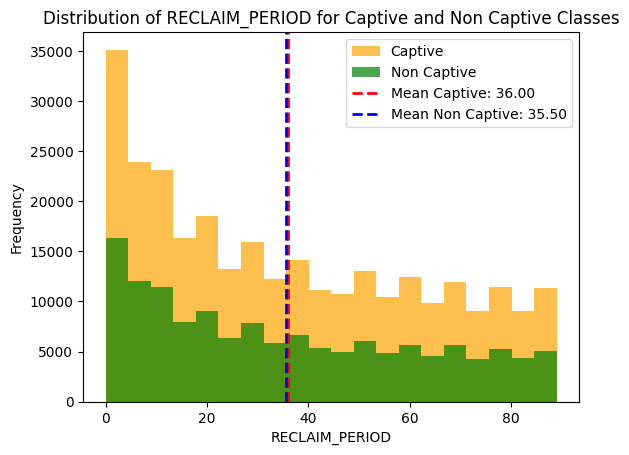

In [ ]:
import matplotlib.pyplot as plt

# Captive 클래스의 RECLAIM_PERIOD 데이터 추출
captive_reclaim = df1[df1['RECLAIM_PERIOD'] >= 0][df1['CAPTIVE_CHANNEL_FLAG'] == 'Captive']['RECLAIM_PERIOD']

# Non Captive 클래스의 RECLAIM_PERIOD 데이터 추출
non_captive_reclaim = df1[df1['RECLAIM_PERIOD'] >= 0][df1['CAPTIVE_CHANNEL_FLAG'] == 'Non Captive']['RECLAIM_PERIOD']

# 히스토그램 그리기
plt.hist(captive_reclaim, bins=20, alpha=0.7, label='Captive', color='orange')
plt.hist(non_captive_reclaim, bins=20, alpha=0.7, label='Non Captive', color='green')

# 각 클래스의 평균 계산
mean_captive = captive_reclaim.mean()
mean_non_captive = non_captive_reclaim.mean()

# 평균을 수직선으로 표시
plt.axvline(x=mean_captive, color='red', linestyle='dashed', linewidth=2, label=f'Mean Captive: {mean_captive:.2f}')
plt.axvline(x=mean_non_captive, color='blue', linestyle='dashed', linewidth=2, label=f'Mean Non Captive: {mean_non_captive:.2f}')

# 플롯 제목과 축 레이블 추가
plt.title('Distribution of RECLAIM_PERIOD for Captive and Non Captive Classes')
plt.xlabel('RECLAIM_PERIOD')
plt.ylabel('Frequency')

# 범례 추가
plt.legend()

# 그래프 표시
plt.show()

In [ ]:
# Captive 클래스의 RECLAIM_PERIOD 데이터 추출
captive_reclaim = df1[df1['RECLAIM_PERIOD'] >= 0][df1['CAPTIVE_CHANNEL_FLAG'] == 'Captive']['RECLAIM_PERIOD']

# Non Captive 클래스의 RECLAIM_PERIOD 데이터 추출
non_captive_reclaim = df1[df1['RECLAIM_PERIOD'] >= 0][df1['CAPTIVE_CHANNEL_FLAG'] == 'Non Captive']['RECLAIM_PERIOD']

# 각 클래스의 평균과 분포 확인
mean_captive = captive_reclaim.mean()
mean_non_captive = non_captive_reclaim.mean()

std_captive = captive_reclaim.std()
std_non_captive = non_captive_reclaim.std()

print("Captive 클래스:")
print(f"평균: {mean_captive:.2f}")
print(f"표준편차: {std_captive:.2f}")
print()

print("Non Captive 클래스:")
print(f"평균: {mean_non_captive:.2f}")
print(f"표준편차: {std_non_captive:.2f}")


C:\Users\jjccyy9741\AppData\Local\Temp\ipykernel_8732\696429647.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  captive_reclaim = df1[df1['RECLAIM_PERIOD'] >= 0][df1['CAPTIVE_CHANNEL_FLAG'] == 'Captive']['RECLAIM_PERIOD']


Captive 클래스:
평균: 36.00
표준편차: 26.71

Non Captive 클래스:
평균: 35.50
표준편차: 26.57


C:\Users\jjccyy9741\AppData\Local\Temp\ipykernel_8732\696429647.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  non_captive_reclaim = df1[df1['RECLAIM_PERIOD'] >= 0][df1['CAPTIVE_CHANNEL_FLAG'] == 'Non Captive']['RECLAIM_PERIOD']


# [2-2] t-test 수행

In [ ]:
from scipy.stats import ttest_ind

# Captive 클래스의 RECLAIM_PERIOD 데이터 추출
captive_reclaim = df1[df1['RECLAIM_PERIOD'] >= 0][df1['CAPTIVE_CHANNEL_FLAG'] == 'Captive']['RECLAIM_PERIOD']

# Non Captive 클래스의 RECLAIM_PERIOD 데이터 추출
non_captive_reclaim = df1[df1['RECLAIM_PERIOD'] >= 0][df1['CAPTIVE_CHANNEL_FLAG'] == 'Non Captive']['RECLAIM_PERIOD']

# Captive 클래스의 데이터 수
num_samples_captive = len(captive_reclaim)

# Non Captive 클래스의 데이터 수
num_samples_non_captive = len(non_captive_reclaim)

# Captive 클래스의 데이터를 Non Captive 클래스의 수에 맞게 랜덤 샘플링
captive_reclaim_downsampled = np.random.choice(captive_reclaim, size=num_samples_non_captive, replace=False)

# Welch의 t-검정 수행
t_statistic, p_value = ttest_ind(captive_reclaim_downsampled, non_captive_reclaim, equal_var=False)

# 결과 출력
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

# p-value를 기준으로 귀무가설을 기각 여부를 판단
alpha = 0.05
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 그룹 간에는 유의한 차이가 있습니다.")
else:
    print("귀무가설을 기각하지 않습니다. 두 그룹 간에는 유의한 차이가 없습니다.")


C:\Users\jjccyy9741\AppData\Local\Temp\ipykernel_8732\4185335812.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  captive_reclaim = df1[df1['RECLAIM_PERIOD'] >= 0][df1['CAPTIVE_CHANNEL_FLAG'] == 'Captive']['RECLAIM_PERIOD']


t-statistic: 5.319148073606644
p-value: 1.043341791130447e-07
귀무가설을 기각합니다. 두 그룹 간에는 유의한 차이가 있습니다.


C:\Users\jjccyy9741\AppData\Local\Temp\ipykernel_8732\4185335812.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  non_captive_reclaim = df1[df1['RECLAIM_PERIOD'] >= 0][df1['CAPTIVE_CHANNEL_FLAG'] == 'Non Captive']['RECLAIM_PERIOD']


In [ ]:
cap_df = df1[df1['RECLAIM_PERIOD'] >= 0][df1['CAPTIVE_CHANNEL_FLAG'] == 'Captive']
noncap_df = df1[df1['RECLAIM_PERIOD'] >= 0][df1['CAPTIVE_CHANNEL_FLAG'] == 'Non Captive']

print(cap_df.shape)
print(noncap_df.shape)

C:\Users\jjccyy9741\AppData\Local\Temp\ipykernel_8732\109252334.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cap_df = df1[df1['RECLAIM_PERIOD'] >= 0][df1['CAPTIVE_CHANNEL_FLAG'] == 'Captive']


(293028, 71)
(139688, 71)


C:\Users\jjccyy9741\AppData\Local\Temp\ipykernel_8732\109252334.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  noncap_df = df1[df1['RECLAIM_PERIOD'] >= 0][df1['CAPTIVE_CHANNEL_FLAG'] == 'Non Captive']


# [2-3] 수리기간 비교

In [ ]:
# 'REPAIR_START_DATE' 및 'REPAIR_END_DATE'를 'YYYYMMDD' 형식의 문자열로 변환
cap_df['REPAIR_START_DATE'] = cap_df['REPAIR_START_DATE'].astype(str)
cap_df['REPAIR_END_DATE'] = cap_df['REPAIR_END_DATE'].astype(str)

noncap_df['REPAIR_START_DATE'] = noncap_df['REPAIR_START_DATE'].astype(str)
noncap_df['REPAIR_END_DATE'] = noncap_df['REPAIR_END_DATE'].astype(str)

# 'YYYYMMDD' 형식의 문자열을 datetime 형식으로 변환
cap_df['REPAIR_START_DATE'] = pd.to_datetime(cap_df['REPAIR_START_DATE'], format='%Y%m%d')
cap_df['REPAIR_END_DATE'] = pd.to_datetime(cap_df['REPAIR_END_DATE'], format='%Y%m%d')

noncap_df['REPAIR_START_DATE'] = pd.to_datetime(noncap_df['REPAIR_START_DATE'], format='%Y%m%d')
noncap_df['REPAIR_END_DATE'] = pd.to_datetime(noncap_df['REPAIR_END_DATE'], format='%Y%m%d')

# 'REPAIR_PERIOD' 열 추가
cap_df['REPAIR_PERIOD'] = cap_df['REPAIR_END_DATE'] - cap_df['REPAIR_START_DATE']
noncap_df['REPAIR_PERIOD'] = noncap_df['REPAIR_END_DATE'] - noncap_df['REPAIR_START_DATE']

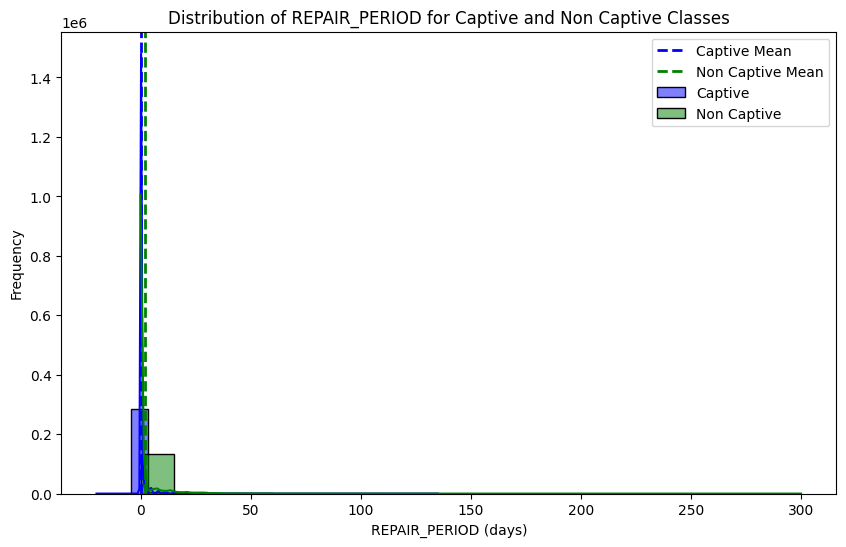

In [ ]:
# 데이터프레임에서 'REPAIR_PERIOD' 열의 분포를 히스토그램으로 그리기
plt.figure(figsize=(10, 6))

# Captive 데이터프레임의 'REPAIR_PERIOD' 분포 및 평균 표시
sns.histplot(cap_df['REPAIR_PERIOD'].dt.days, bins=20, kde=True, color='blue', label='Captive')
plt.axvline(x=cap_df['REPAIR_PERIOD'].dt.days.mean(), color='blue', linestyle='dashed', linewidth=2, label='Captive Mean')

# Non Captive 데이터프레임의 'REPAIR_PERIOD' 분포 및 평균 표시
sns.histplot(noncap_df['REPAIR_PERIOD'].dt.days, bins=20, kde=True, color='green', label='Non Captive')
plt.axvline(x=noncap_df['REPAIR_PERIOD'].dt.days.mean(), color='green', linestyle='dashed', linewidth=2, label='Non Captive Mean')

# 플롯 제목과 축 레이블 추가
plt.title('Distribution of REPAIR_PERIOD for Captive and Non Captive Classes')
plt.xlabel('REPAIR_PERIOD (days)')
plt.ylabel('Frequency')

# 범례 추가
plt.legend()

# 그래프 표시
plt.show()

In [ ]:
# Captive 클래스의 'REPAIR_PERIOD' 통계량 확인
print("Captive 클래스:")
print(cap_df['REPAIR_PERIOD'].dt.days.describe())
print()

# Non Captive 클래스의 'REPAIR_PERIOD' 통계량 확인
print("Non Captive 클래스:")
print(noncap_df['REPAIR_PERIOD'].dt.days.describe())

Captive 클래스:
count    293028.000000
mean          0.275970
std           1.917931
min         -20.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         135.000000
Name: REPAIR_PERIOD, dtype: float64

Non Captive 클래스:
count    139688.000000
mean          1.881235
std           7.768765
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         300.000000
Name: REPAIR_PERIOD, dtype: float64


In [ ]:
cap_df[cap_df['REPAIR_START_DATE']>cap_df['REPAIR_END_DATE']][['REPAIR_START_DATE','REPAIR_END_DATE','REPAIR_PERIOD']]

,REPAIR_START_DATE,REPAIR_END_DATE,REPAIR_PERIOD
368491,2022-01-30,2022-01-10,-20 days
4675515,2022-06-28,2022-06-14,-14 days


#### 수리 시작일이 수리 종료일보다 큰 데이터 삭제

In [ ]:
cap_df = cap_df[cap_df['REPAIR_START_DATE']<=cap_df['REPAIR_END_DATE']]